## Loading Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe(include="all").fillna("-")

,age,sex,bmi,children,smoker,region,charges
count,1338.0,1338,1338.0,1338.0,1338,1338,1338.0
unique,-,2,-,-,2,4,-
top,-,male,-,-,no,southeast,-
freq,-,676,-,-,1064,364,-
mean,39.207025,-,30.663397,1.094918,-,-,13270.422265
std,14.04996,-,6.098187,1.205493,-,-,12110.011237
min,18.0,-,15.96,0.0,-,-,1121.8739
25%,27.0,-,26.29625,0.0,-,-,4740.28715
50%,39.0,-,30.4,1.0,-,-,9382.033
75%,51.0,-,34.69375,2.0,-,-,16639.912515


## Checking Outliers

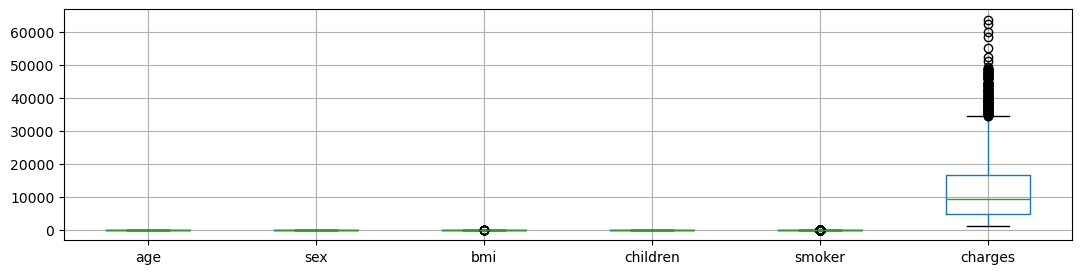

In [32]:
plt.figure(figsize=(13,3))
data.boxplot()
plt.show()

## Encoding categorical columns

In [8]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
data["sex"] = le.fit_transform(data.sex)
data["smoker"] = le.fit_transform(data.smoker)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## Relationship of charges with region

<Axes: xlabel='region', ylabel='charges'>

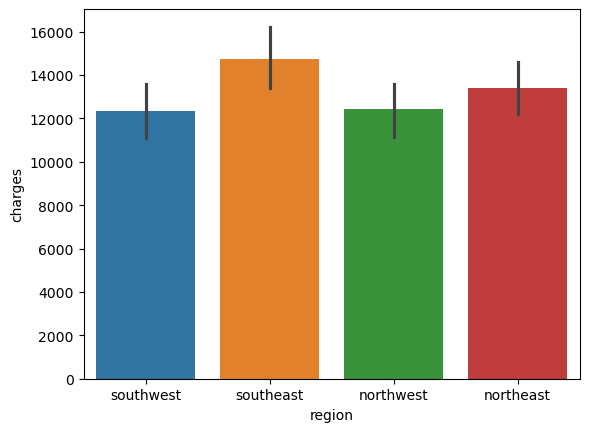

In [9]:
sns.barplot(data=data,y=data.charges,x=data.region,hue= data.region)

## OneHotEncoding

In [10]:
data_new = pd.get_dummies(data)

In [11]:
data_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


## Distribution of numerical columns

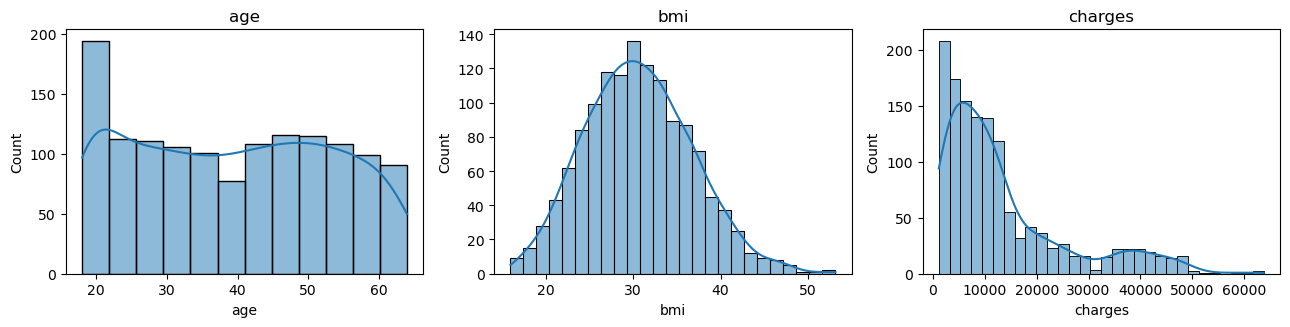

In [12]:
col = data_new[["age","bmi","charges"]]
plt.figure(figsize=(13,9))

for i,j in enumerate(col.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(col[j],kde=True)
    plt.title(j)

plt.tight_layout()
plt.show()

## Visualization of discrete columns

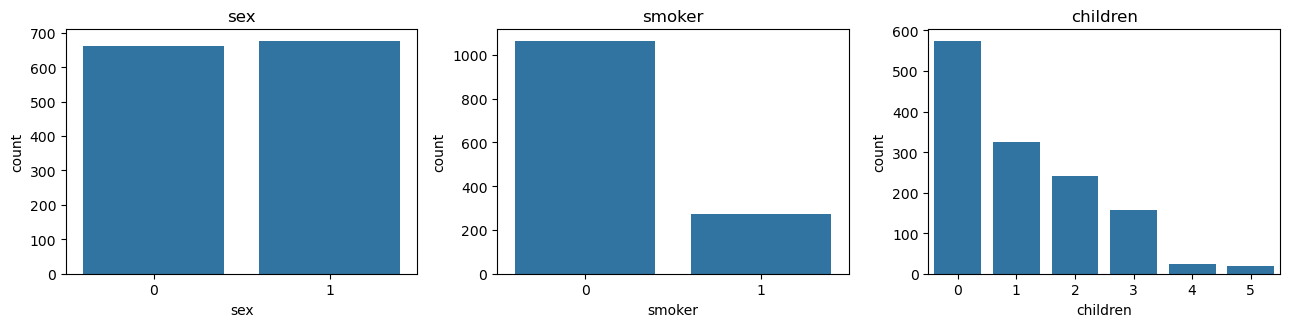

In [13]:
cat_col = data_new[["sex","smoker","children"]]
plt.figure(figsize=(13,9))

for i,j in enumerate(cat_col.columns,1):
    plt.subplot(3,3,i)
    sns.barplot(cat_col[j].value_counts())
    plt.title(j)
plt.tight_layout()
plt.show()

## Correlation of target variable(charges) with other columns

In [14]:
x,y = data_new.drop(columns="charges"),data_new.charges

In [15]:
x.corrwith(y).sort_values()

region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex                 0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker              0.787251
dtype: float64

## Relationship of charges with smokers

<Axes: xlabel='smoker', ylabel='charges'>

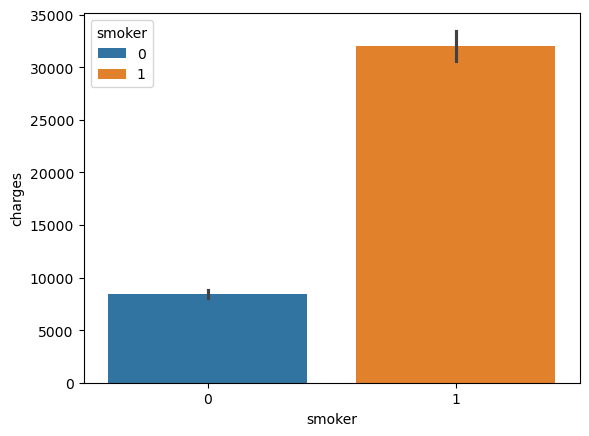

In [16]:
sns.barplot(data=data,y=data.charges,x=data.smoker,hue= data.smoker)

## Relationship of charges with age

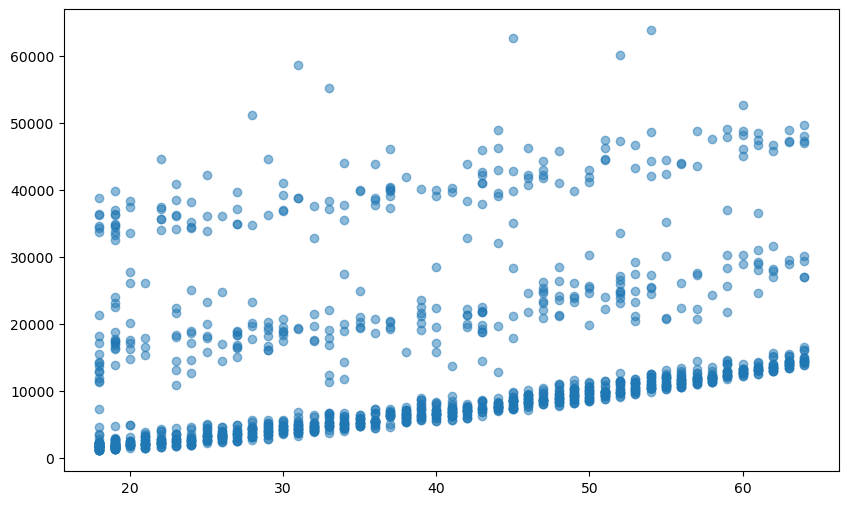

In [17]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.scatter(data['age'], data['charges'], alpha=0.5)

## Base Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [19]:
x_train, x_test , y_train ,y_test = train_test_split(x,y,test_size=.20,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
pred = model.predict(x_test)
r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)

print(f"MSE: {mse} \nR2: {r2}")

MSE: 33596915.85136147 
R2: 0.7835929767120723


### **R2 squared value was found to be 78%**

## Scaling


### Standardscalar

In [21]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
columns_to_scale = ['age', 'bmi', 'children']
data_new[columns_to_scale] = scalar.fit_transform(data_new[columns_to_scale])

In [22]:
data_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,False,False,False,True
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,False,False,True,False
2,-0.797954,1,0.383307,1.580926,0,4449.46200,False,False,True,False
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,False,True,False,False
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,False,True,False,False


## Log transformation to Y variable

In [23]:
data_new['log_charges'] = np.log(data_new['charges'])

In [24]:
data_new.drop(columns="charges",inplace=True)

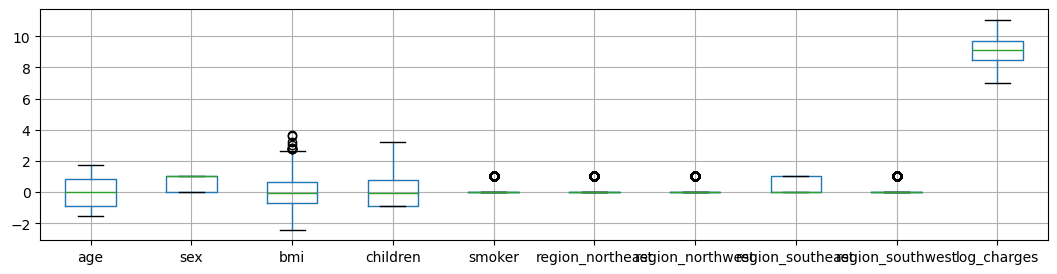

In [25]:
plt.figure(figsize=(13,3))
data_new.boxplot()
plt.show()

## Model training

In [26]:
X,Y = data_new.drop(columns=["region_northeast","log_charges"]),data_new.log_charges

In [27]:
x_train, x_test , y_train ,y_test = train_test_split(X,Y,test_size=.20,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
pred = model.predict(x_test)
r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)

print(f"MSE: {mse} \nR2: {r2}")

MSE: 0.17557416396791667 
R2: 0.8047311493462985


## Removing influence points

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

f = 'log_charges ~ ' + ' + '.join(X.columns)


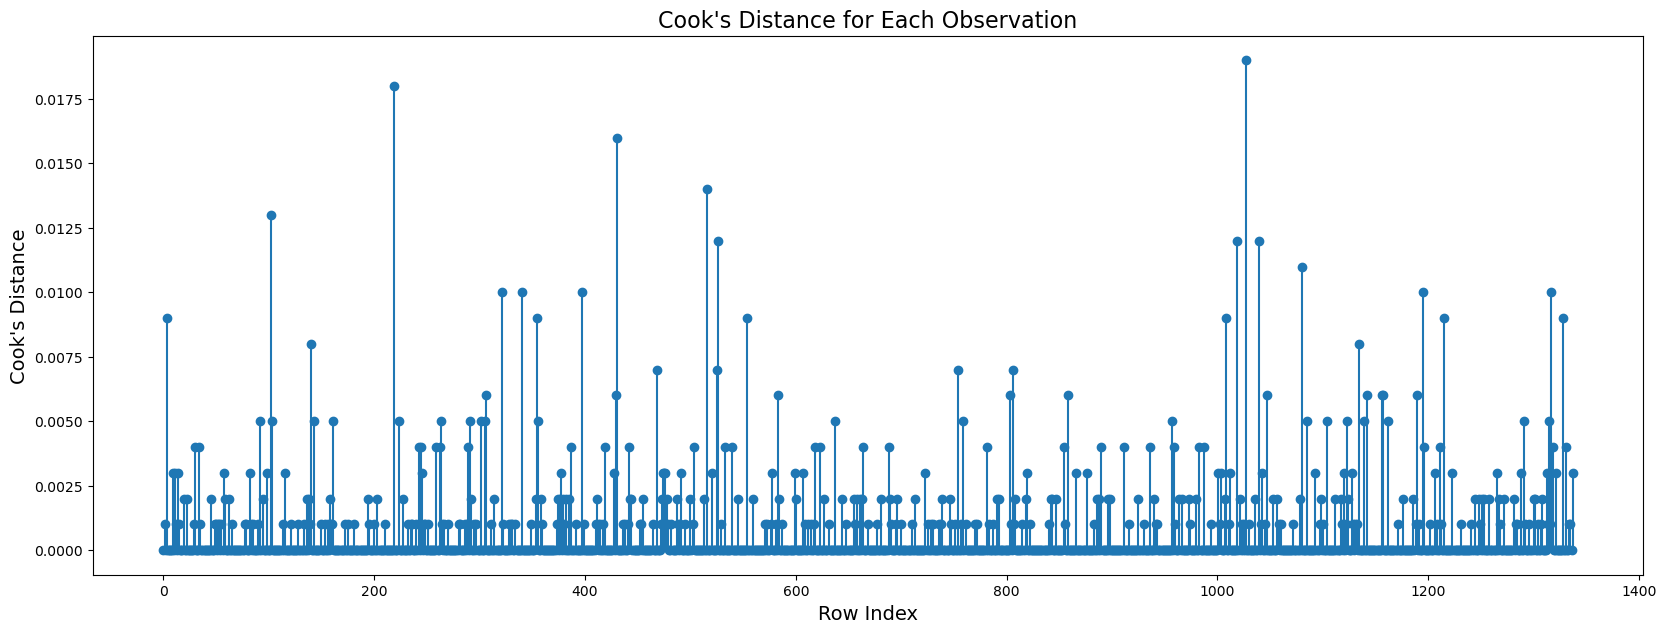

Number of influential points: 102
                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1543.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:02:28   Log-Likelihood:                -134.83
No. Observations:                1236   AIC:                             287.7
Df Residuals:                    1227   BIC:                             333.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [31]:
model1 = ols(formula=f,data=data_new).fit()
model_influence = model1.get_influence()

# Calculate Cook's Distance
c, _ = model_influence.cooks_distance

# Plot Cook's Distance
fig, ax = plt.subplots(figsize=(20, 7))
ax.stem(np.arange(len(data_new)), np.round(c, 3), basefmt=" ")
plt.xlabel('Row Index', fontsize=14)
plt.ylabel("Cook's Distance", fontsize=14)
plt.title("Cook's Distance for Each Observation", fontsize=16)
plt.show()

# Set a threshold for Cook's Distance (commonly 4/n)
threshold = 4 / len(data_new)

# Find influential points (Cook's Distance greater than the threshold)
influential_points = np.where(c > threshold)[0]

# Print number of influential points
print(f"Number of influential points: {len(influential_points)}")

# Remove influential points from the dataset
data_cleaned = data_new.drop(index=influential_points).reset_index()

# Refit the model on the cleaned dataset
model_cleaned = ols(f, data=data_cleaned).fit()

# # Print the summary of the new model
print(model_cleaned.summary())

# # Check Cook's Distance again after cleaning
influence_cleaned = model_cleaned.get_influence()
c_cleaned, _ = influence_cleaned.cooks_distance
print(f"Max Cook's Distance after cleaning: {max(c_cleaned)}")


### After removing 100 influence points the final r2 squared value is 91%

In [ ]:

# new_data = data_new.copy()
# for i in  range(110):
#     model_cleaned = smf.ols(formula=f,data=new_data).fit()
#     c,_ =model_cleaned.get_influence().cooks_distance
#     print(np.max(c))
#     influence = np.argmax(c)
#     print(influence)
#     new_data = new_data.drop(new_data.index[influence],axis=0)
#     model_cleaned = smf.ols(formula=f, data=new_data).fit()
#     r_square = model_cleaned.rsquared
# print(r_square)